In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [ ]:
nike = pd.read_csv("/content/nike_europe_sales_2022_2024.csv")
nike.head()

,Year,Country_or_Region,SalesChannel,ProductCategory,ProductType,Currency,Revenue_EUR,UnitsSold,AvgSellingPrice_EUR,GrossMargin_Percent,DiscountRate_Percent,Collaboration
0,2022,United Kingdom,Nike Stores,Footwear,Running Shoes,EUR,96076.11,1868,51.43,40.9,22.0,NaN
1,2022,United Kingdom,Nike Stores,Footwear,Lifestyle Sneakers,EUR,137052.18,783,175.03,40.9,10.7,NaN
2,2022,United Kingdom,Nike Stores,Footwear,Football Boots,EUR,175195.07,895,195.75,49.0,16.8,NaN
3,2022,United Kingdom,Nike Stores,Footwear,Basketball Shoes,EUR,146031.80,791,184.62,46.8,21.9,NaN
4,2022,United Kingdom,Nike Stores,Apparel,Jackets,EUR,99682.47,520,191.70,42.3,13.7,NaN


In [ ]:
nike.isnull().sum()

,0
Year,0
Country_or_Region,0
SalesChannel,0
ProductCategory,0
ProductType,0
Currency,0
Revenue_EUR,0
UnitsSold,0
AvgSellingPrice_EUR,0
GrossMargin_Percent,0


In [ ]:
nike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  792 non-null    int64  
 1   Country_or_Region     792 non-null    object 
 2   SalesChannel          792 non-null    object 
 3   ProductCategory       792 non-null    object 
 4   ProductType           792 non-null    object 
 5   Currency              792 non-null    object 
 6   Revenue_EUR           792 non-null    float64
 7   UnitsSold             792 non-null    int64  
 8   AvgSellingPrice_EUR   792 non-null    float64
 9   GrossMargin_Percent   792 non-null    float64
 10  DiscountRate_Percent  792 non-null    float64
 11  Collaboration         73 non-null     object 
dtypes: float64(4), int64(2), object(6)
memory usage: 74.4+ KB


## Pricing and Profitability Analysis

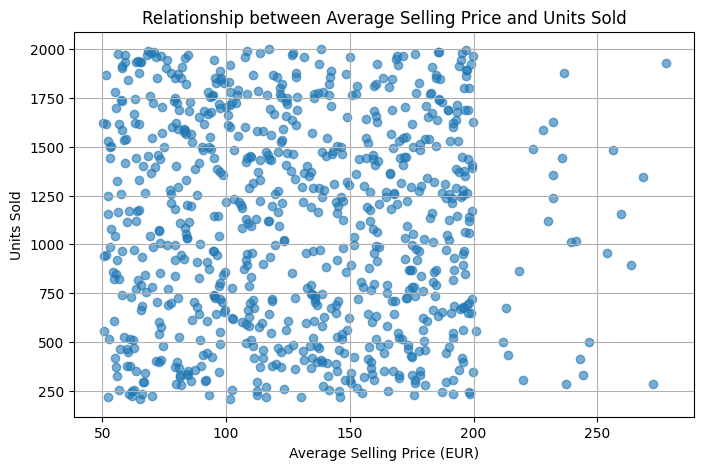

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(nike["AvgSellingPrice_EUR"], nike["UnitsSold"], alpha=0.6)
plt.title("Relationship between Average Selling Price and Units Sold")
plt.xlabel("Average Selling Price (EUR)")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()

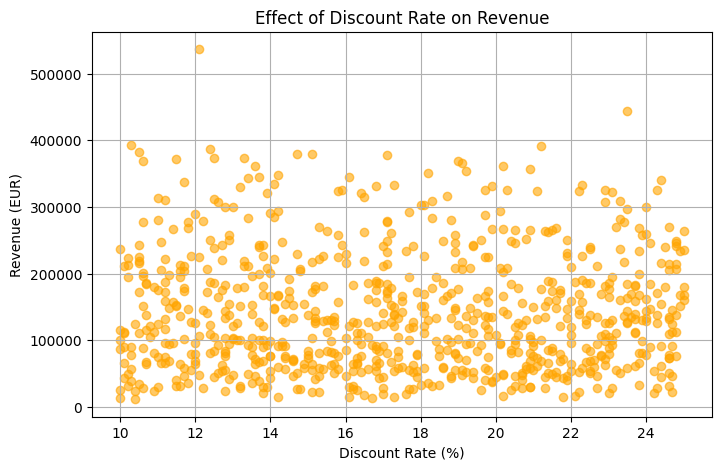

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(nike["DiscountRate_Percent"], nike["Revenue_EUR"], alpha=0.6, color='orange')
plt.title("Effect of Discount Rate on Revenue")
plt.xlabel("Discount Rate (%)")
plt.ylabel("Revenue (EUR)")
plt.grid(True)
plt.show()


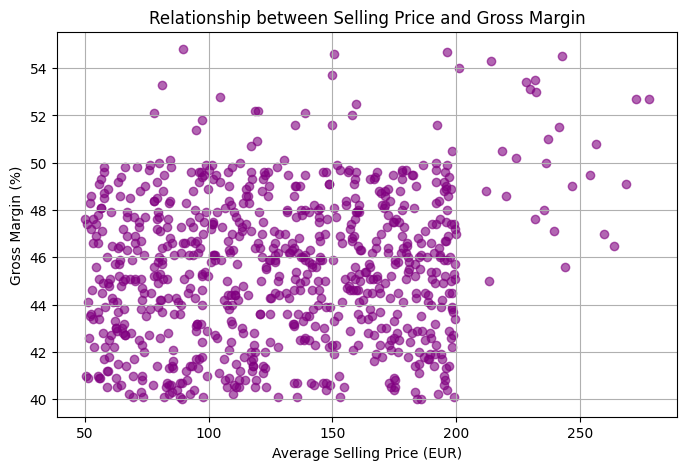

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(nike["AvgSellingPrice_EUR"], nike["GrossMargin_Percent"], alpha=0.6, color='purple')
plt.title("Relationship between Selling Price and Gross Margin")
plt.xlabel("Average Selling Price (EUR)")
plt.ylabel("Gross Margin (%)")
plt.grid(True)
plt.show()

## Trend Analysis

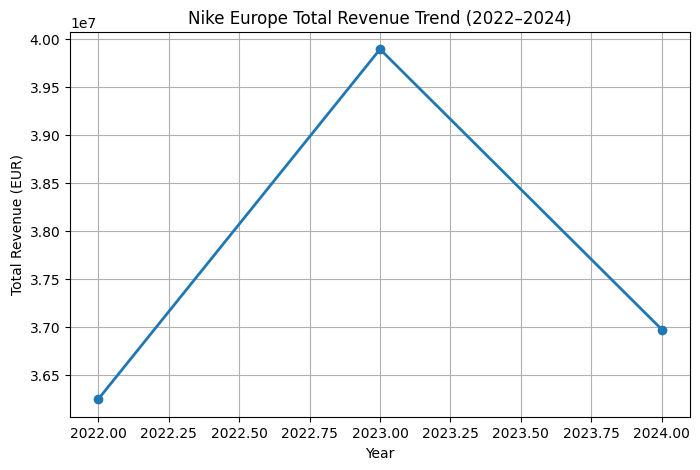

In [ ]:
nike_sorted = nike.sort_values(by='Year')
revenue_by_year = nike_sorted.groupby("Year")["Revenue_EUR"].sum()

plt.figure(figsize=(8, 5))
plt.plot(revenue_by_year.index, revenue_by_year.values, marker='o', linewidth=2)
plt.title("Nike Europe Total Revenue Trend (2022–2024)")
plt.xlabel("Year")
plt.ylabel("Total Revenue (EUR)")
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

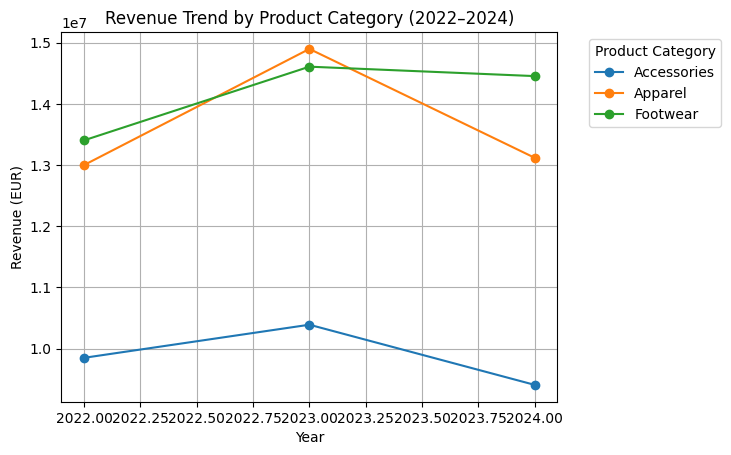

In [ ]:
category_trend = nike_sorted.groupby(["Year", "ProductCategory"])["Revenue_EUR"].sum().unstack()

plt.figure(figsize=(10, 6))
category_trend.plot(marker='o')
plt.title("Revenue Trend by Product Category (2022–2024)")
plt.xlabel("Year")
plt.ylabel("Revenue (EUR)")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<Figure size 1500x600 with 0 Axes>

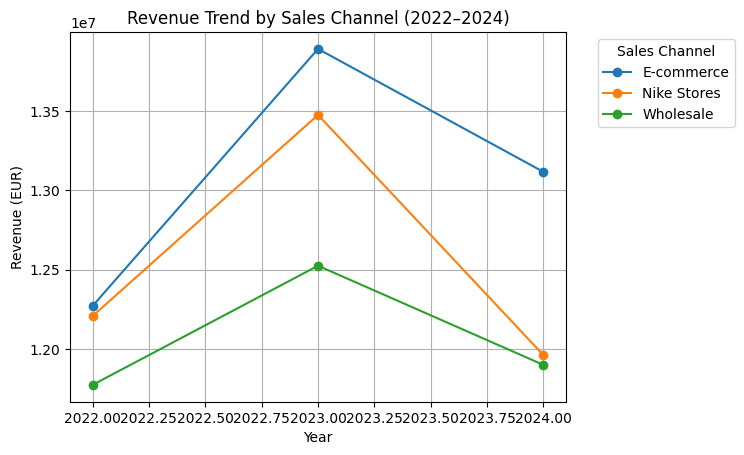

In [ ]:
channel_trend = nike_sorted.groupby(["Year", "SalesChannel"])["Revenue_EUR"].sum().unstack()

plt.figure(figsize=(15, 6))
channel_trend.plot(marker='o')
plt.title("Revenue Trend by Sales Channel (2022–2024)")
plt.xlabel("Year")
plt.ylabel("Revenue (EUR)")
plt.legend(title="Sales Channel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Channel Performance Analysis

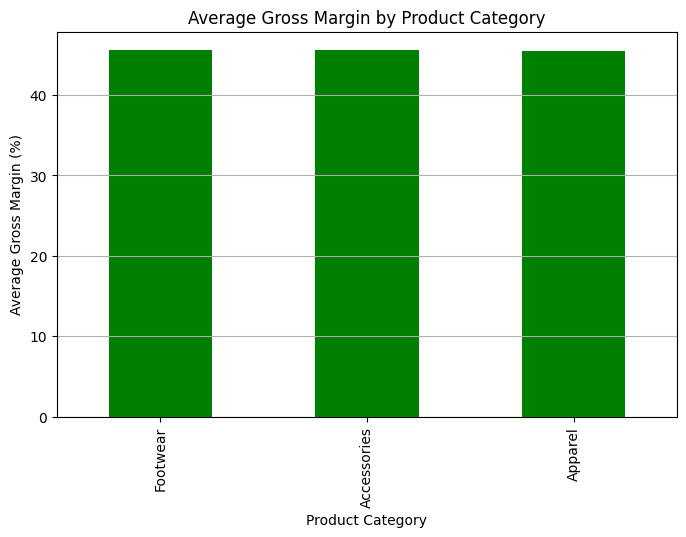

In [ ]:
category_margin = nike.groupby("ProductCategory")["GrossMargin_Percent"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_margin.plot(kind="bar", color='green')
plt.title("Average Gross Margin by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Gross Margin (%)")
plt.grid(axis='y')
plt.show()

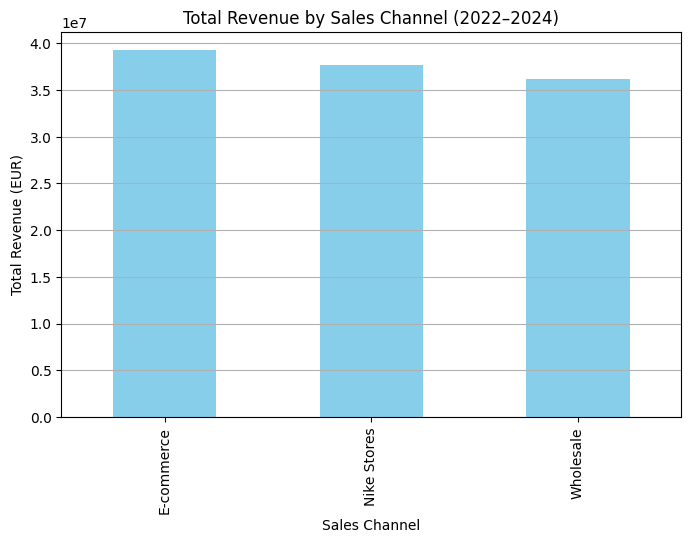

In [ ]:
channel_summary = nike.groupby("SalesChannel")[["Revenue_EUR", "GrossMargin_Percent", "DiscountRate_Percent"]].mean().sort_values(by="Revenue_EUR", ascending=False)

channel_revenue = nike.groupby("SalesChannel")["Revenue_EUR"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
channel_revenue.plot(kind='bar', color='skyblue')
plt.title("Total Revenue by Sales Channel (2022–2024)")
plt.xlabel("Sales Channel")
plt.ylabel("Total Revenue (EUR)")
plt.grid(axis='y')
plt.show()

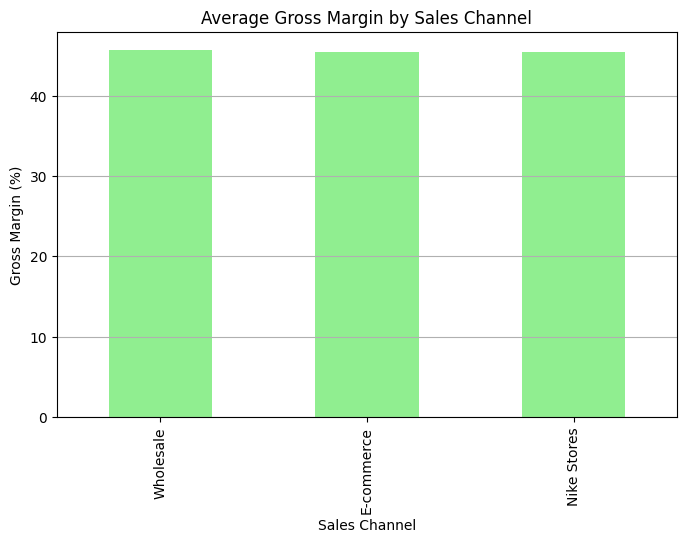

In [ ]:
channel_margin = nike.groupby("SalesChannel")["GrossMargin_Percent"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
channel_margin.plot(kind='bar', color='lightgreen')
plt.title("Average Gross Margin by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Gross Margin (%)")
plt.grid(axis='y')
plt.show()

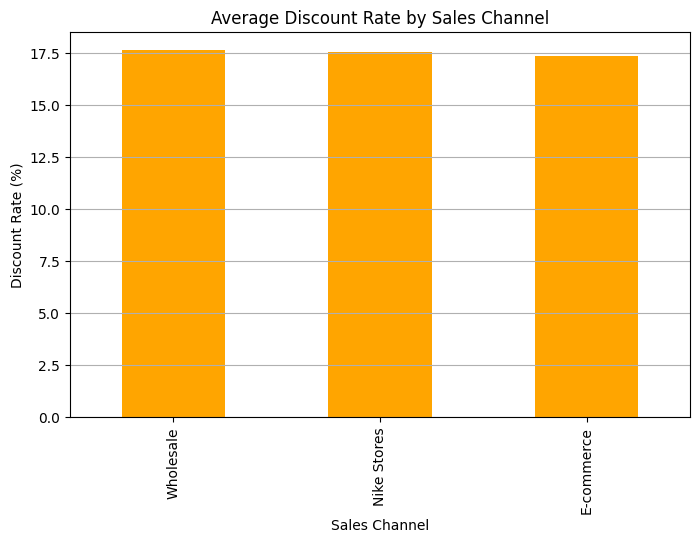

In [ ]:
channel_discount = nike.groupby("SalesChannel")["DiscountRate_Percent"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
channel_discount.plot(kind='bar', color='orange')
plt.title("Average Discount Rate by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Discount Rate (%)")
plt.grid(axis='y')
plt.show()

In [ ]:
product_category_map = {
    1: 'Footwear',
    2: 'Apparel',
    3: 'Accessories'
}

category_margin_named = category_margin.copy()
category_margin_named = category_margin_named.rename(index=product_category_map)

print("\nAverage Gross Margin by Product Category (with correct names):\n")
print(category_margin_named.round(2))


Average Gross Margin by Product Category (with correct names):

ProductCategory
Footwear       45.59
Accessories    45.56
Apparel        45.43
Name: GrossMargin_Percent, dtype: float64


In [ ]:
sales_channel_map = {
    1: 'Nike Stores',
    2: 'E-commerce',
    3: 'Wholesale'
}

channel_summary_named = channel_summary.copy()
channel_summary_named = channel_summary_named.rename(index=sales_channel_map)

print("\nChannel Performance Summary (with correct names):\n")
print(channel_summary_named.round(2))


Channel Performance Summary (with correct names):

              Revenue_EUR  GrossMargin_Percent  DiscountRate_Percent
SalesChannel                                                        
E-commerce      148787.94                45.45                 17.34
Nike Stores     142585.53                45.44                 17.53
Wholesale       137100.12                45.68                 17.63


## Linear Regression

In [ ]:
nike = nike.drop(['Year', 'Collaboration', 'Country_or_Region'], axis=1)
nike.head()

,SalesChannel,ProductCategory,ProductType,Currency,Revenue_EUR,UnitsSold,AvgSellingPrice_EUR,GrossMargin_Percent,DiscountRate_Percent
0,Nike Stores,Footwear,Running Shoes,EUR,96076.11,1868,51.43,40.9,22.0
1,Nike Stores,Footwear,Lifestyle Sneakers,EUR,137052.18,783,175.03,40.9,10.7
2,Nike Stores,Footwear,Football Boots,EUR,175195.07,895,195.75,49.0,16.8
3,Nike Stores,Footwear,Basketball Shoes,EUR,146031.80,791,184.62,46.8,21.9
4,Nike Stores,Apparel,Jackets,EUR,99682.47,520,191.70,42.3,13.7


In [ ]:
for col in nike:
    if nike[col].dtype == 'O':
        codes, _ = pd.factorize(nike[col])
        nike[col] = codes + 1

In [ ]:
X = nike.drop('Revenue_EUR', axis=1)
y = nike['Revenue_EUR']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
nikelin = LinearRegression()
nikelin.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = nikelin.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 617620157.5011969
R2 Score: 0.9177232461466966


## Polynominal Regression

In [ ]:
nikepoly = PolynomialFeatures()
X_train_poly = nikepoly.fit_transform(X_train)
X_test_poly = nikepoly.transform(X_test)

nikepoly_regressor = LinearRegression()
nikepoly_regressor.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred_poly = nikepoly_regressor.predict(X_test_poly)

In [ ]:
print("Mean Squared Error :", mean_squared_error(y_test, y_pred_poly))
print("R2 Score :", r2_score(y_test, y_pred_poly))

Mean Squared Error : 13.51492525865521
R2 Score : 0.9999999981995986


## Decision Tree Regressor

In [ ]:
nikedecision = DecisionTreeRegressor()
nikedecision.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = nikedecision.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 145298311.849583
R2 Score: 0.9806439713889593


## Random Forest Regressor

In [ ]:
nikerandom = RandomForestRegressor()
nikerandom.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = nikerandom.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 28805510.872269887
R2 Score: 0.9961626512689528


## XGBoost Regressor

In [ ]:
salesxgb = xgb.XGBRegressor()
salesxgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = salesxgb.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 31721654.300811052
R2 Score: 0.9957741749341749


## Gradient Regressor

In [ ]:
salesgrad = GradientBoostingRegressor()
salesgrad.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = salesgrad.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 32142155.13584136
R2 Score: 0.9957181575855202


## Citation

ChatGPT